In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from psyrun.store import AutodetectStore
store = AutodetectStore()

In [3]:
from cue.analysis.conversion import DataRep
from cue.analysis import evaluation as ev
from cue.analysis.io import read_exp_data
from cue.protocols import PROTOCOLS

In [4]:
sns.set('paper', None, None, font_scale=0.8, rc={'lines.linewidth': 1., 'lines.markersize': 4.})

In [5]:
col_spacing = 0.25
full_w = 7.
col_w = (full_w - col_spacing) / 2.

## Serial

In [6]:
proto = PROTOCOLS['serial']
exp_data = read_exp_data(proto.exp_data)
model_data = DataRep('psyrun', store.load('../data/final/serial/result.npz'))

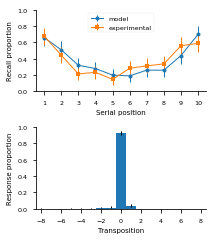

In [7]:
fig = plt.figure(figsize=(0.9 * col_w, col_w))
ax = fig.add_subplot(2, 1, 1)
ev.evaluate_serial_pos_curve(proto, exp_data, model_data, ax=ax)
ax.legend(loc='upper center')
ev.evaluate_transpositions(proto, exp_data, model_data, ax=fig.add_subplot(2, 1, 2))
sns.despine(fig)
fig.tight_layout()

In [8]:
fig.savefig('../../cogsci18-cue/plots/serial.pdf', bbox_inches='tight', pad_inches=0.)

## Free recall

In [9]:
immediate = (
    PROTOCOLS['immediate'],
    read_exp_data(PROTOCOLS['immediate'].exp_data),
    DataRep('psyrun', store.load('../data/final/immediate/result.npz')))
delayed = (
    PROTOCOLS['delayed'],
    read_exp_data(PROTOCOLS['delayed'].exp_data),
    DataRep('psyrun', store.load('../data/final/delayed/result.npz')))
contdist = (
    PROTOCOLS['contdist'],
    read_exp_data(PROTOCOLS['contdist'].exp_data),
    DataRep('psyrun', store.load('../data/final/contdist/result.npz')))

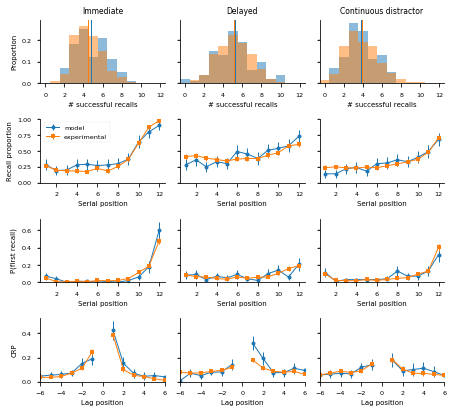

In [10]:
fig = plt.figure(figsize=(0.9 * full_w, 0.825 * full_w))

ax = fig.add_subplot(4, 3, 1)
ax.set_title("Immediate")
ev.evaluate_successful_recalls(*immediate, ax=ax)
ax.legend().remove()

ax = fig.add_subplot(4, 3, 2, sharey=ax)
ax.set_title("Delayed")
ev.evaluate_successful_recalls(*delayed, ax=ax)
ax.legend().remove()

ax = fig.add_subplot(4, 3, 3, sharey=ax)
ax.set_title("Continuous distractor")
ev.evaluate_successful_recalls(*contdist, ax=ax)
ax.legend().remove()


ax = fig.add_subplot(4, 3, 4)
ev.evaluate_serial_pos_curve(*immediate, ax=ax, strict=False)

ax = fig.add_subplot(4, 3, 5, sharey=ax)
ev.evaluate_serial_pos_curve(*delayed, ax=ax, strict=False)
ax.legend().remove()

ax = fig.add_subplot(4, 3, 6, sharey=ax)
ev.evaluate_serial_pos_curve(*contdist, ax=ax, strict=False)
ax.legend().remove()


ax = fig.add_subplot(4, 3, 7)
ev.evaluate_p_first_recall(*immediate, ax=ax)
ax.legend().remove()

ax = fig.add_subplot(4, 3, 8, sharey=ax)
ev.evaluate_p_first_recall(*delayed, ax=ax)
ax.legend().remove()

ax = fig.add_subplot(4, 3, 9, sharey=ax)
ev.evaluate_p_first_recall(*contdist, ax=ax)
ax.legend().remove()


ax = fig.add_subplot(4, 3, 10)
ev.evaluate_crp(*immediate, ax=ax)
ax.legend().remove()

ax = fig.add_subplot(4, 3, 11, sharey=ax)
ev.evaluate_crp(*delayed, ax=ax)
ax.legend().remove()

ax = fig.add_subplot(4, 3, 12, sharey=ax)
ev.evaluate_crp(*contdist, ax=ax)
ax.legend().remove()

sns.despine(fig)
fig.tight_layout()

In [11]:
fig.savefig('../../cogsci18-cue/plots/free.pdf', bbox_inches='tight', pad_inches=0.)